In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn import decomposition
from sklearn.decomposition import PCA

import itertools

import scipy

import scikitplot as skplt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Load data
data = pd.read_csv("K-Means_jewelry_customers.csv")

In [3]:
# Normalize the data
X = data.copy()

scaler = StandardScaler()
features = ['Age','Income','SpendingScore','Savings']
X[features] = scaler.fit_transform(X[features])

In [4]:
# Create a PCA instance: pca
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.63815124, 0.30236345, 0.04967322, 0.00981208])

<BarContainer object of 4 artists>

Text(0.5, 0, 'PCA features')

Text(0, 0.5, 'variance %')

([<matplotlib.axis.XTick at 0x7ffb3877cdf0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

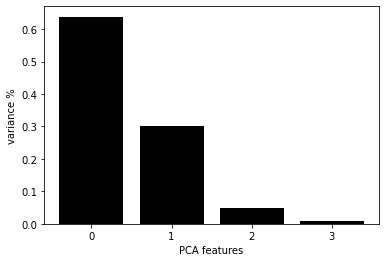

In [5]:
# Plot the explained variances
features_pca = range(pca.n_components_)
plt.bar(features_pca, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features_pca)

In [6]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

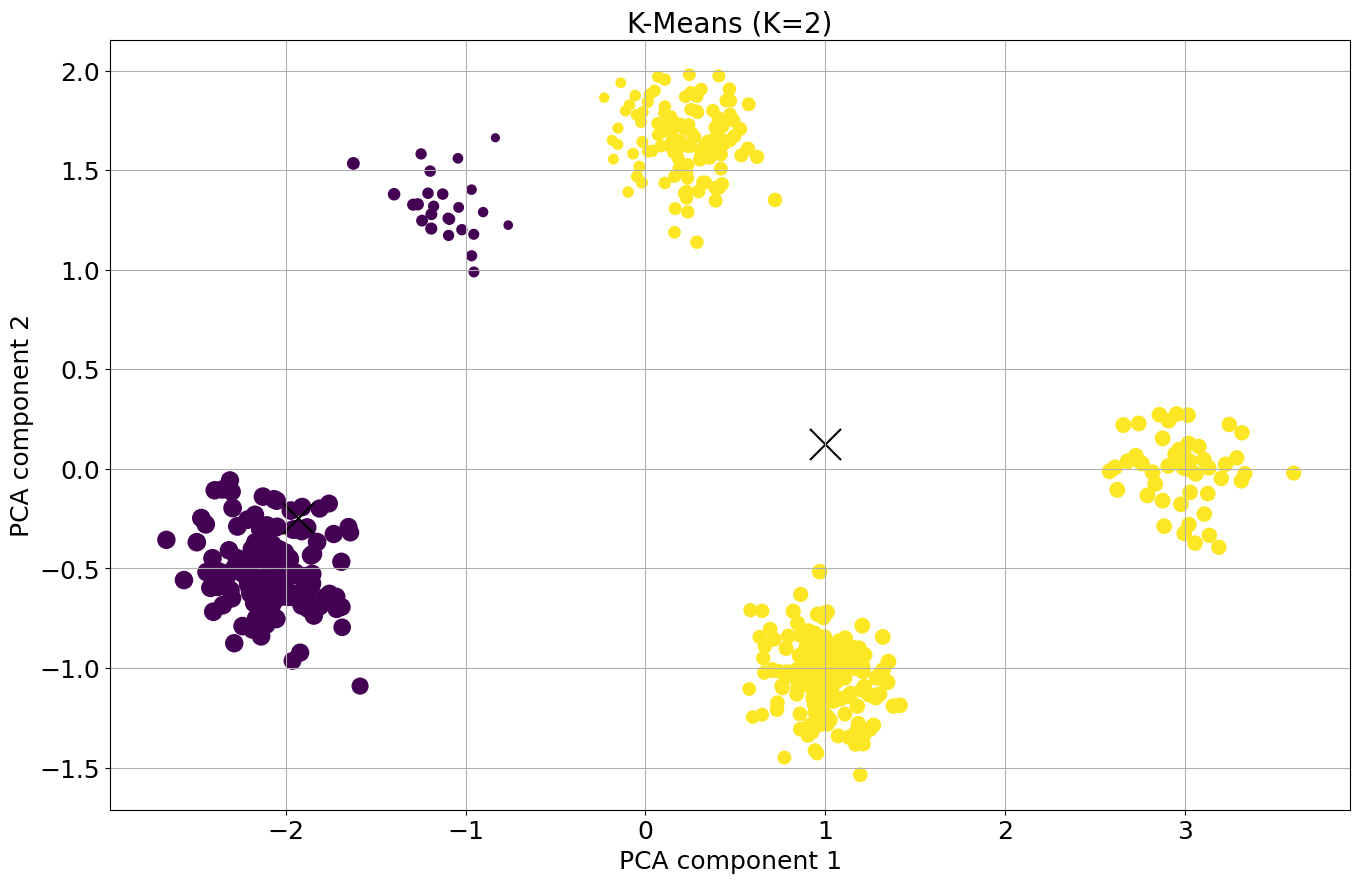

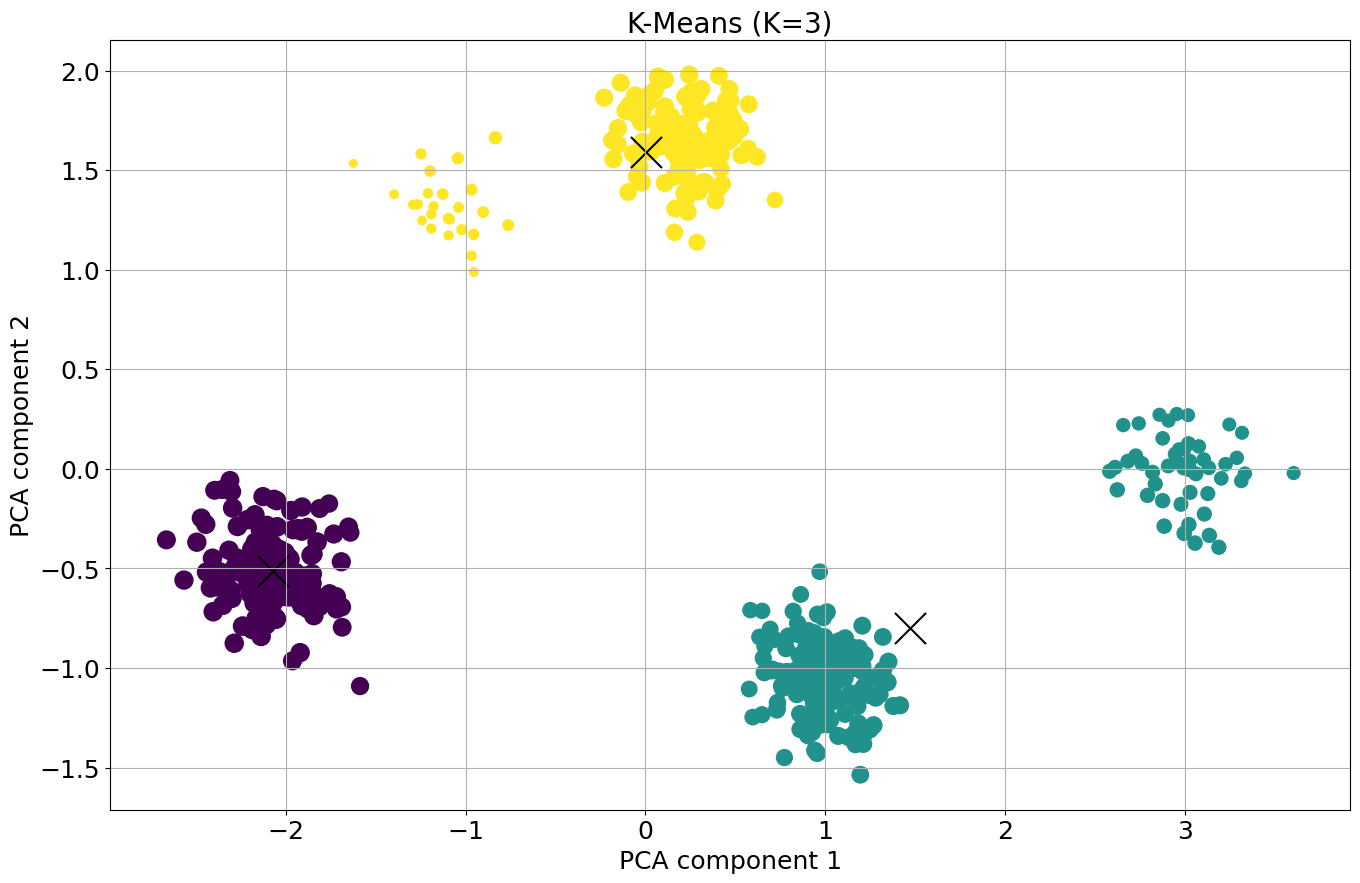

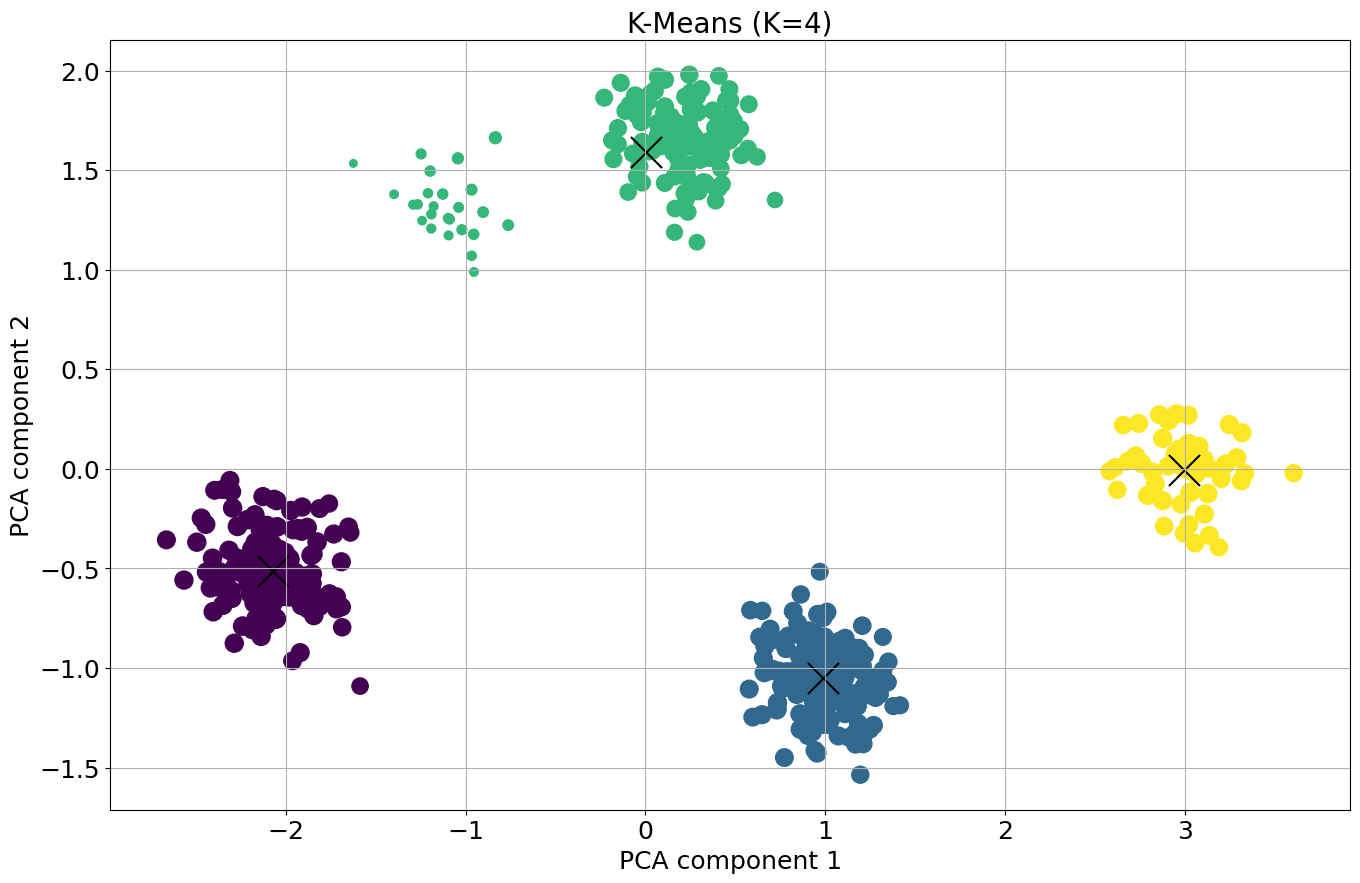

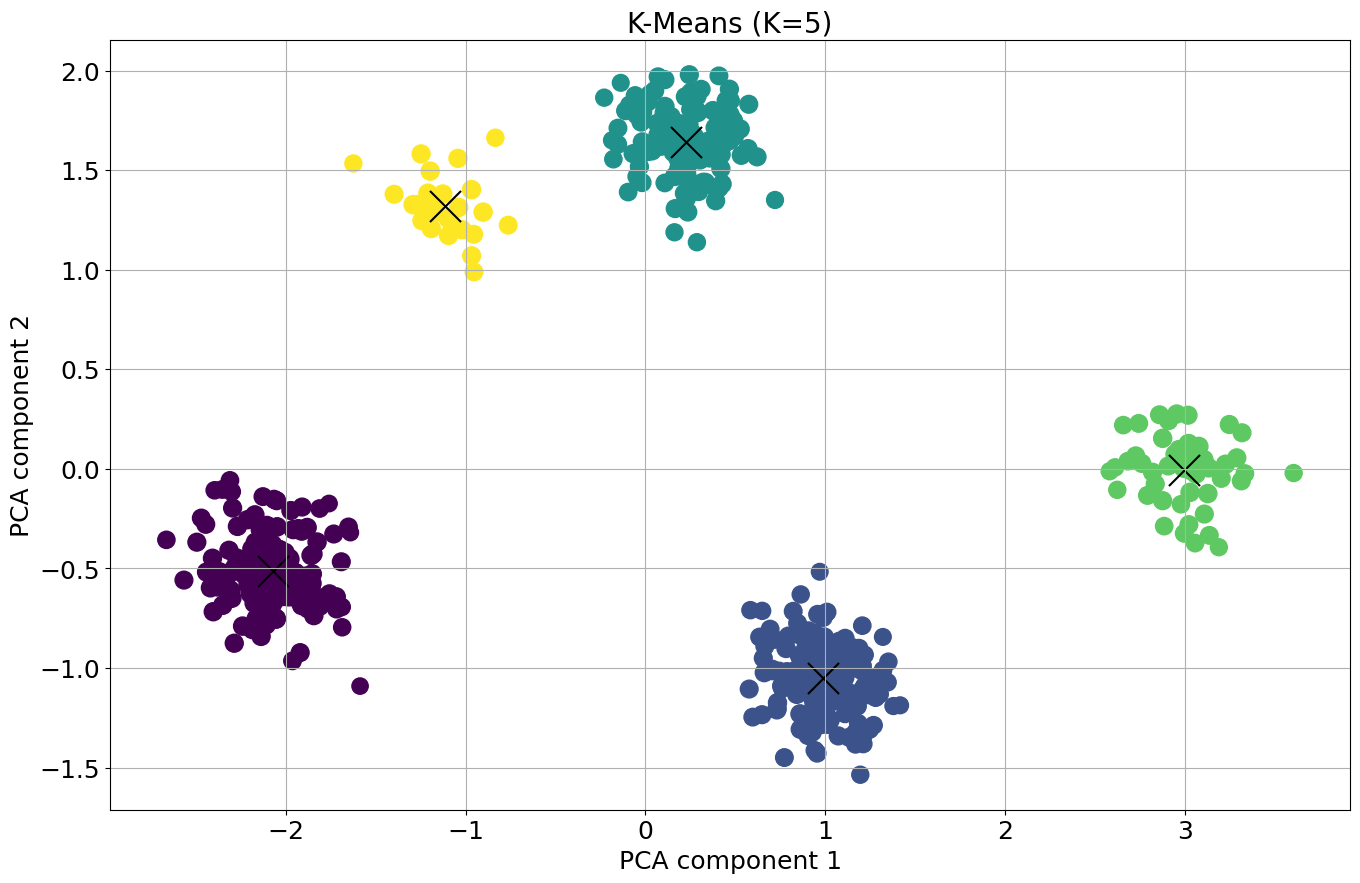

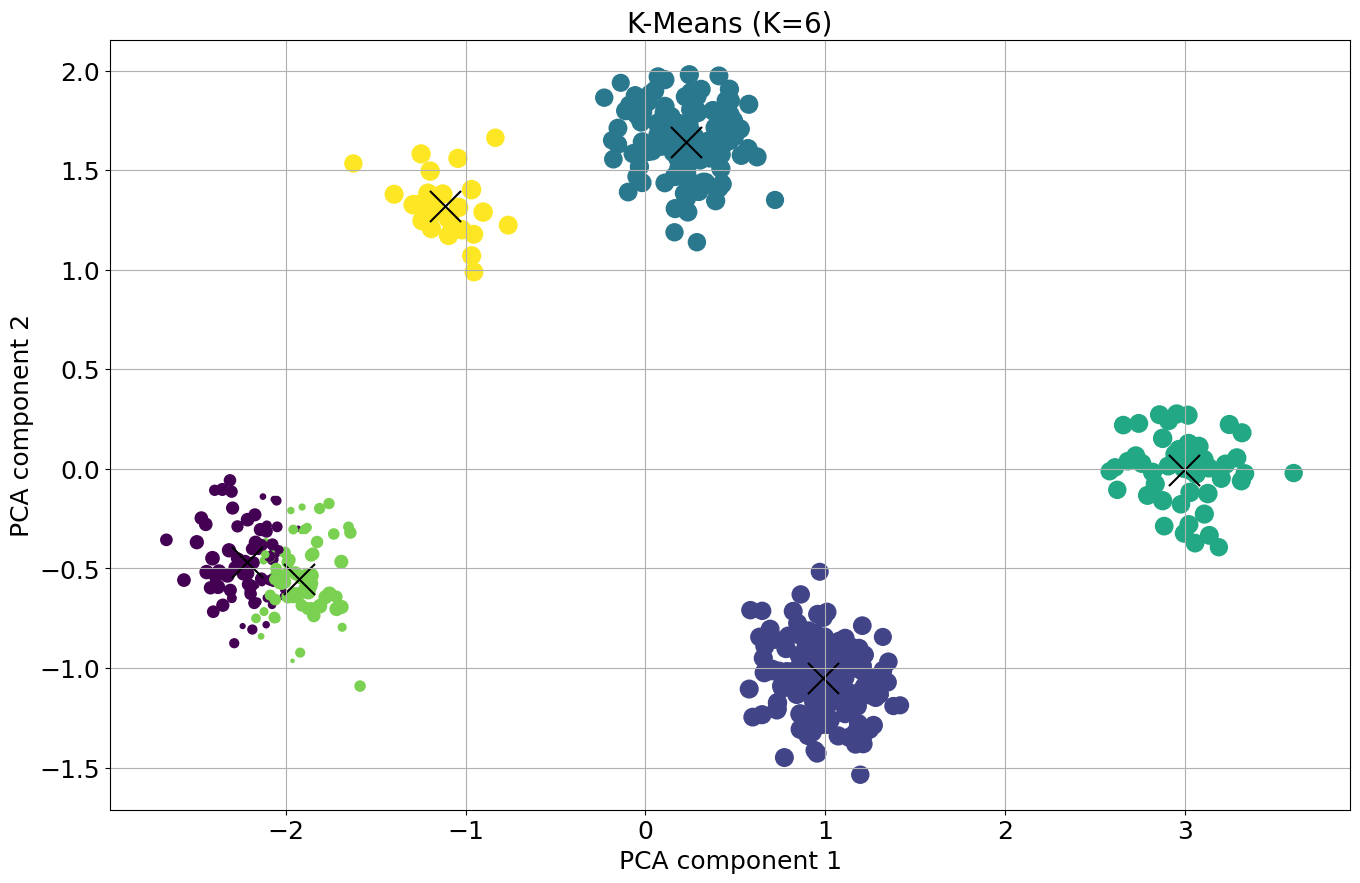

/Users/keert/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


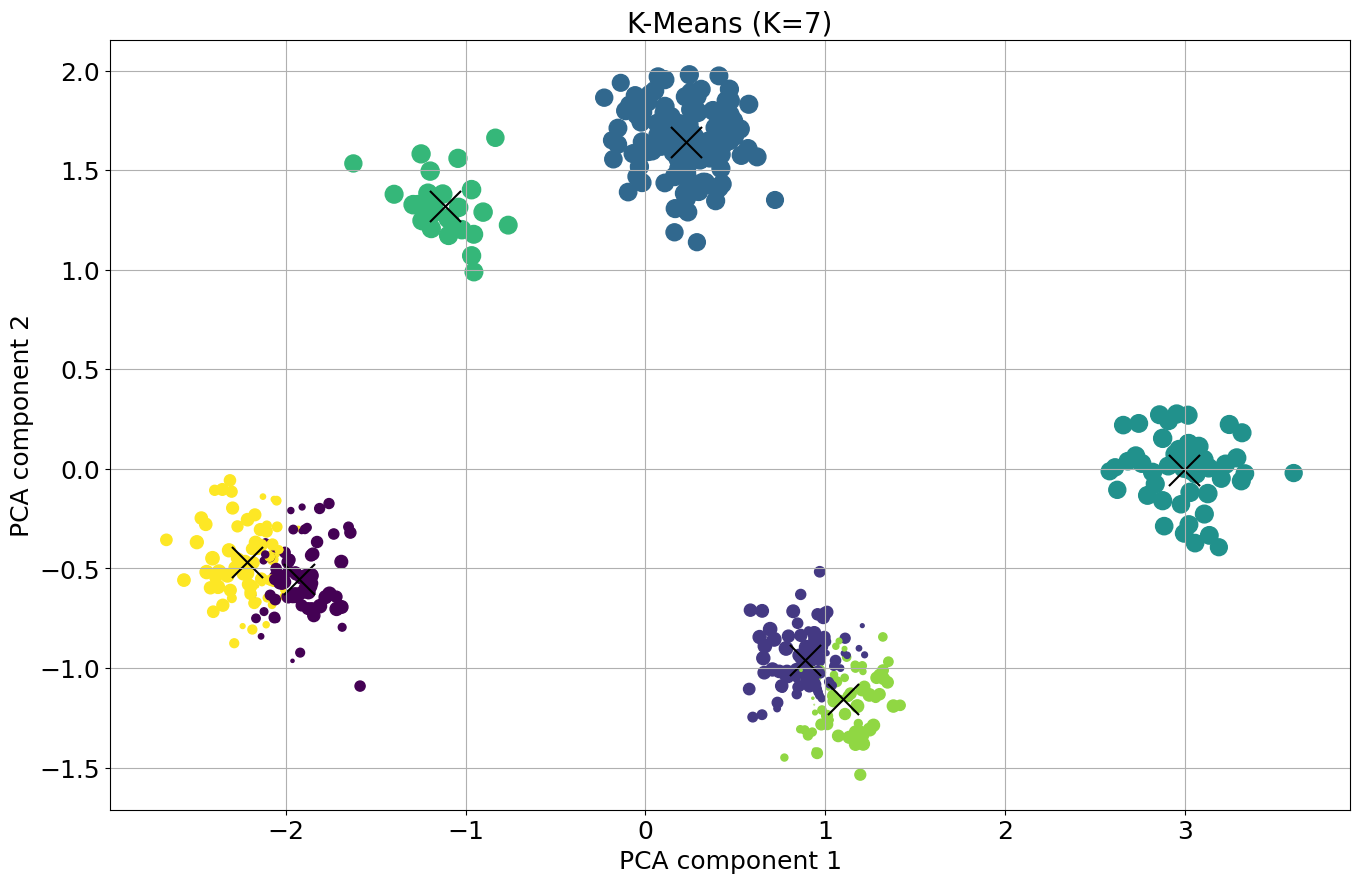

In [7]:
# Experimenting with different k values
def do_kmeans(PCA_components, k):
    #k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
   # k_means.fit(X)
   #wcss = k_means.inertia_
   # sil = silhouette_score(X, k_means.labels_)
    
    #K-means clustering
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(PCA_components.iloc[:,:3])
    #wcss = k_means.inertia_
    #sil = silhouette_score(X, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(PCA_components.iloc[:,:3], k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={})".format(k), fontsize=20);
    plt.xlabel('PCA component 1', fontsize=18);
    plt.ylabel('PCA component 2', fontsize=18);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.show()
    
    #print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 8):
    do_kmeans(PCA_components, k)

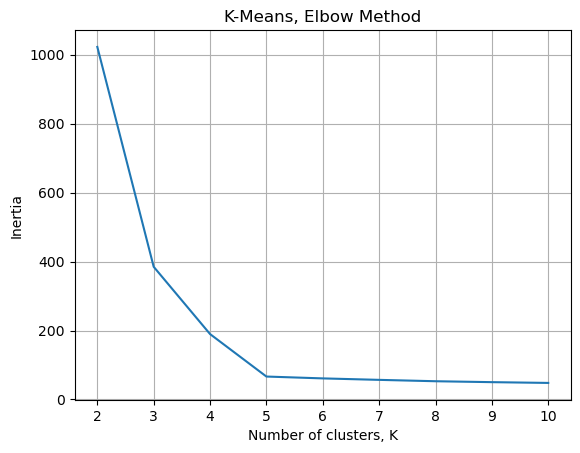

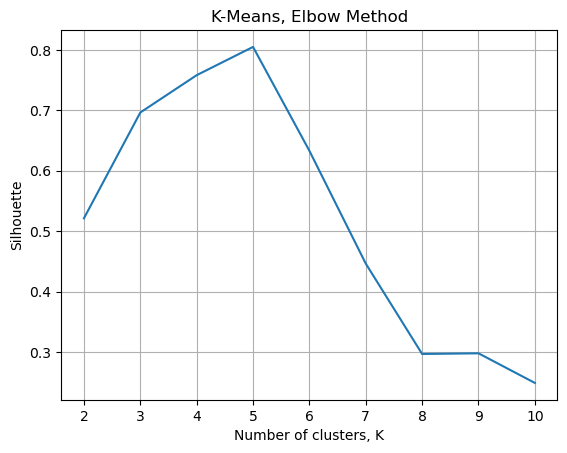

In [8]:
#Elbow Method
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

KMeans(n_clusters=5, random_state=42)

<Figure size 1600x1000 with 0 Axes>

Text(0.5, 1.0, 'K-Means (K=5)')

Text(0.5, 0, 'PCA component 1')

Text(0, 0.5, 'PCA component 2')

(array([-3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-1.1160592552556445, 1.3218590135274673, '4')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.9849141264154954, -1.049486822846277, '1')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(2.9939531360419798, -0.0046093172550718455, '3')

Text(0.22621206292592333, 1.6432941818684206, '2')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

Text(-2.0743565523578704, -0.5108955456053652, '0')

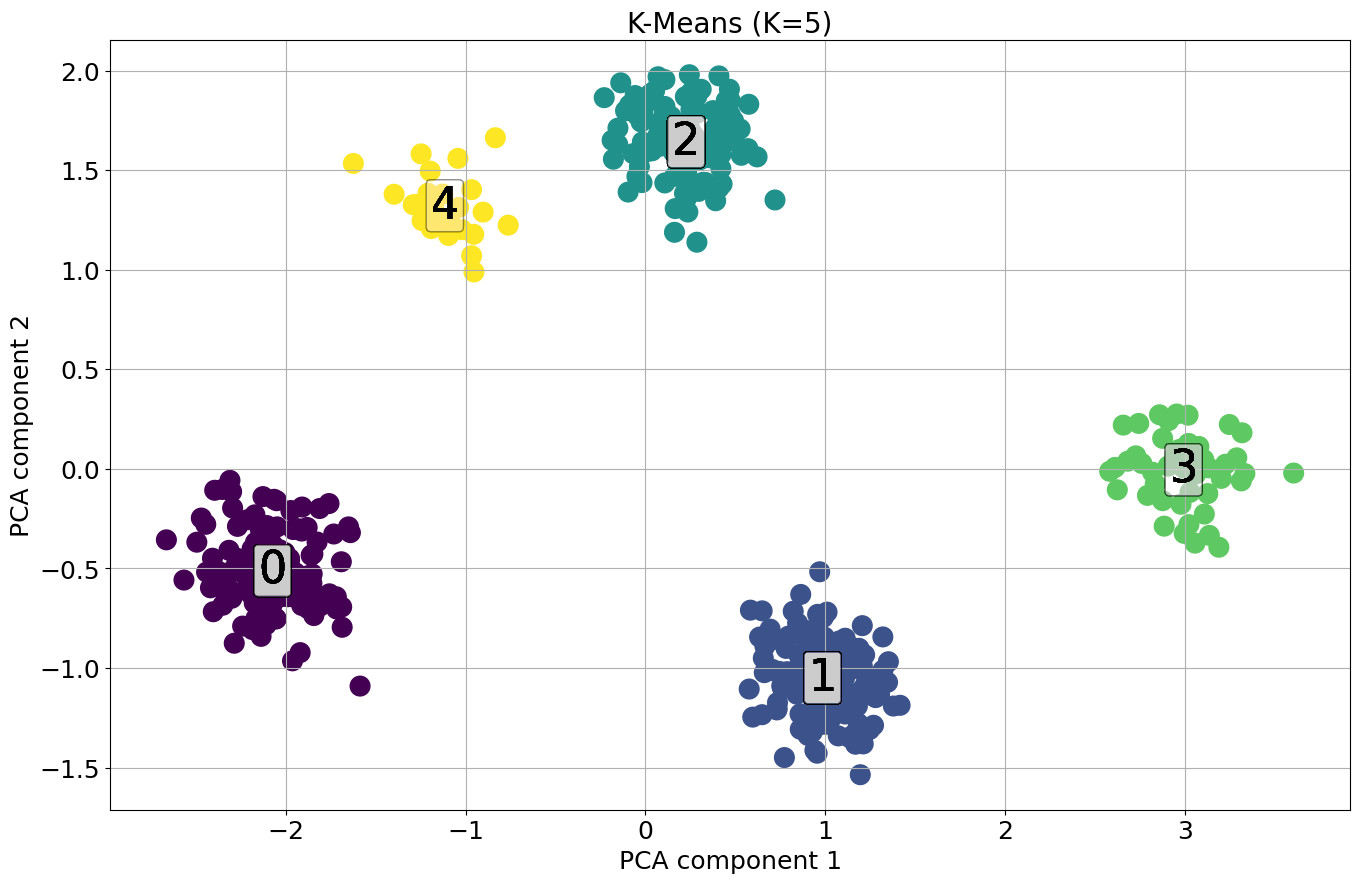

In [9]:
# Plot K-means clusters using top two PCA components
k_means = KMeans(n_clusters=5, random_state=42)
k_means.fit(PCA_components.iloc[:,:3])

plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(PCA_components.iloc[:, 0], PCA_components.iloc[:, 1], s=200, c=k_means.labels_);
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('PCA component 1', fontsize=18)
plt.ylabel('PCA component 2', fontsize=18)
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32,
                       horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));
    

<AxesSubplot:title={'center':'Silhouette Analysis'}, xlabel='Silhouette coefficient values', ylabel='Cluster label'>

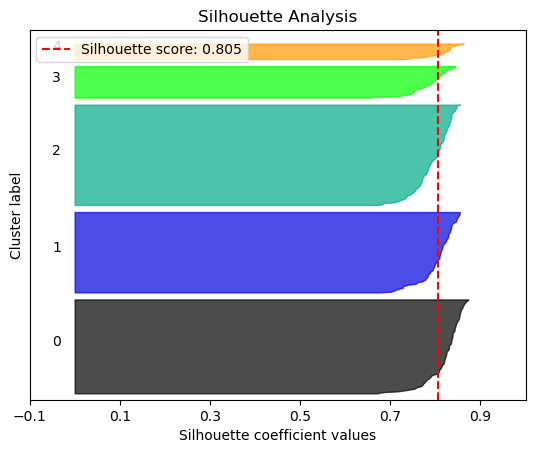

In [10]:
# Plot silhouette graph using top two PCA components
cluster_labels = k_means.fit_predict(X)
skplt.metrics.plot_silhouette(X, cluster_labels)

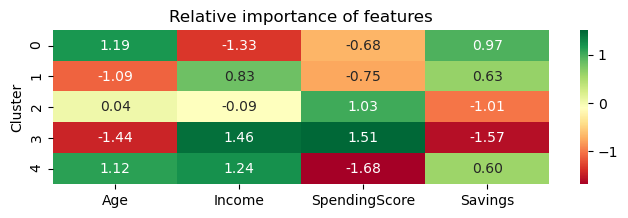

In [11]:
# Relative importance plot
dat = X.copy()

dat['Cluster'] = k_means.labels_

cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');